In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import vice
import sys
sys.path.append("../")
from vice_utils import calculate_z, sample_stars, filter_stars, show_stars, R_to_zone, zone_to_R, show_at_R_z
from imp import reload
import vice_utils
import warnings
import yields
from plotting_utils import fig_saver
import scipy
import apogee_analysis as aah
import pandas as pd
from yields import amplified_yields

In [1]:
sf = fig_saver("f")

NameError: name 'fig_saver' is not defined

In [175]:
tau_rise = 2
tau_sfh = 30
def insideout(t):
    return 3*(1-np.exp(-t/tau_rise)) * np.exp(-t/tau_sfh)

t_max = 13.2
M_T = 0.1 # solar mases
tau_scale = 5 # Gyr
def ifr(t):
    return M_T * (tau_scale *(1-np.exp(-t_max/tau_scale)))**(-1) *np.exp(-t/tau_scale)

A = 1.5
s_burst = 1
t_burst = 11.2
def lateburst(t):
    return sfh(t) * (1 + A * np.exp(-(t-t_burst)**2/(2*s_burst**2)))

In [320]:
sfr_0 = 10**-5
tau_star = 5
tau_star_q = 10**5  # Gyr

def burst(t, t0, dt):
    return (-tau_star_q + tau_star) * ((t < t0 + dt) & (t > t0))

def sfr(t):
    return 0.5*(t<9) +  (burst(t, 9, 1) + burst(t, 12.5, 1))

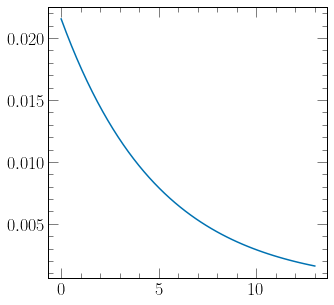

In [321]:
t = np.linspace(0, 13.)
plt.plot(t, ifr(t))

In [322]:

def sfr(t):
    return tau_star_q + (burst(t, 7, 0.15) + burst(t, 11, 0.15) + burst(t, 9, 0.15) + burst(t, 12.5, 0.15)) 

In [323]:
def y_c(z):
    return 0.004 * (z/0.014)**0
vice.yields.ccsne.settings["c"] = y_c
vice.yields.agb.settings["c"]  = "cristallo11"
vice.yields.agb.settings["o"] = lambda m, z: 0
vice.yields.sneia.settings["o"] = 0
vice.yields.ccsne.settings["o"] = 0.015
vice.yields.ccsne.settings["c"] = 0.004

In [324]:
def show_line(out, x, y, ax=None, fig=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    f = ax.plot(out.history[x], out.history[y], **kwargs)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

In [325]:
def show(out, x, y, ax=None, fig=None):
    if ax is None:
        fig, ax = plt.subplots()
    f = ax.scatter(out.history[x], out.history[y], c=out.history["time"], cmap="cool")
    fig.colorbar(f, ax=ax, label="t/Gyr")
    ax.set_xlabel(x)
    ax.set_ylabel(y)


In [326]:
np.log10(vice.solar_z("o")) + 12

9.757396028793025

In [327]:
model = vice.singlezone(func=ifr, mode="ifr", tau_star = sfr, dt=0.01, elements=("n", "o", "fe", "c"), schmidt=True)

In [328]:
t_max = 13.2
out = model.run(np.linspace(0, t_max, round(100*t_max + 1)), overwrite=True, capture=True)


/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/vice/core/singlezone/singlezone.py:1779: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  overwrite = overwrite)


(-0.2, -0.086518324886714)

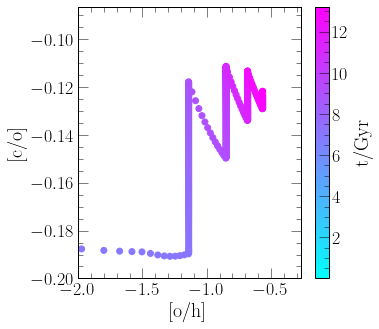

In [331]:
show(out, "[o/h]", "[c/o]")
plt.xlim(-2)
plt.ylim(-0.2)

In [410]:

def y_c(z):
    return 0.004
vice.yields.ccsne.settings["c"] = y_c
vice.yields.agb.settings["c"]  = "cristallo11"
vice.yields.agb.settings["o"] = lambda m, z: 0
vice.yields.sneia.settings["o"] = 0
vice.yields.ccsne.settings["o"] = 0.015

def tau_star2(t):
    return 10*(t < 3)
model2 = vice.singlezone(func=ifr, mode="ifr", dt=0.01, elements=("n", "o", "fe", "c"), schmidt=True, tau_star=tau_star2)


In [411]:
out2 = model2.run(np.linspace(0, t_max, round(100*t_max + 1)), overwrite=True, capture=True)

/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/vice/core/callback.py:119: ScienceWarning: Function <function callback2_nan_inf.__call__ at 0x2b4453263730> evaluated to NaN at (n_agb, 1.0536247165342056, nan). Suppressing ArithmeticError by returning 0. Checking simulation output for numerical consistency is advised.
  str(function), str(args)), ScienceWarning)
/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/vice/core/callback.py:119: ScienceWarning: Function <function callback2_nan_inf.__call__ at 0x2b4453263730> evaluated to NaN at (n_agb, 1.0532865122288237, nan). Suppressing ArithmeticError by returning 0. Checking simulation output for numerical consistency is advised.
  str(function), str(args)), ScienceWarning)
/users/PAS2232/aeyobd/.local/lib/python3.6/site-packages/vice/core/callback.py:119: ScienceWarning: Function <function callback2_nan_inf.__call__ at 0x2b4453263730> evaluated to NaN at (n_agb, 1.052948807423037, nan). Suppressing ArithmeticError by retur

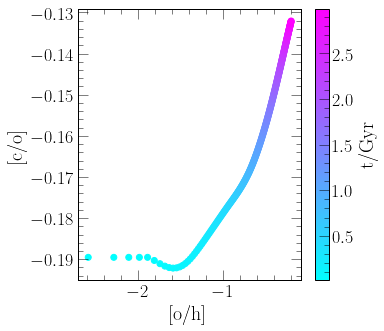

In [412]:
show(out2, "[o/h]", "[c/o]")

(-2.0, 0.12031504122381922)

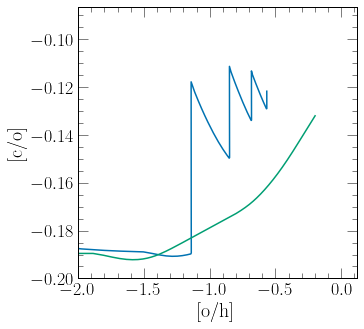

In [413]:
fig, ax = plt.subplots()
show_line(out, "[o/h]", "[c/o]", ax=ax)
show_line(out2, "[o/h]", "[c/o]", ax=ax)

plt.ylim(-0.2)
plt.xlim(-2)